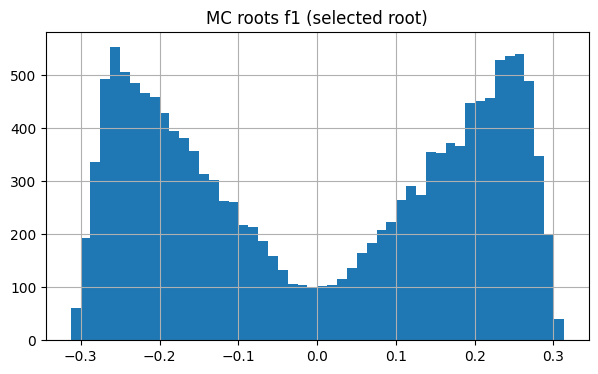

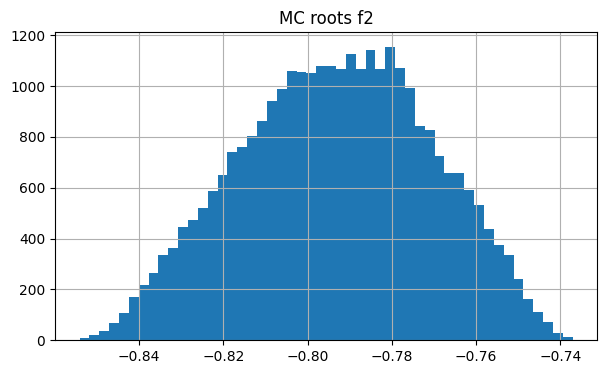

Nominal root f1: -0.0
f1 MC mean/std: 0.0009878242138914163 0.19731928528420592
f1 analytic sigma: inf
Nominal root f2: -0.7925503345804225
f2 MC mean/std: -0.7931604749528886 0.022524328962915254
f2 analytic sigma: 0.02239083302361389


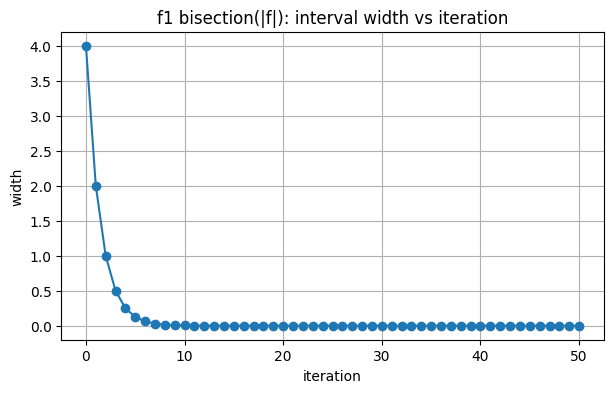

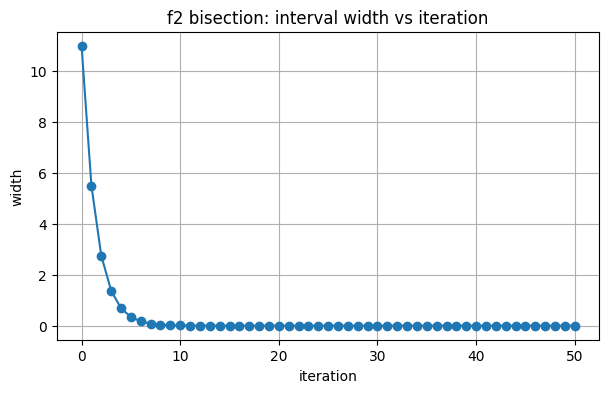

f1 final interval: (-3.552713678800501e-15, 0.0)
f2 final interval: (-0.7925503345804286, -0.7925503345804188)


In [5]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.optimize import brentq

rng = np.random.default_rng(42)

f1_a0 = (-0.1, 0.1)
f1_a1 = (-0.1, 0.1)
f1_a2 = (1.0, 1.1)

f2_a0 = (1.1, 1.2)
f2_a1 = (1.9, 2.1)
f2_a2 = (1.0, 1.1)

def f1(x,a0,a1,a2): return a2*x*x + a1*x + a0
def f2(x,a0,a1,a2): return math.exp(a2*x) + a1*x + a0

def mid(a): return 0.5*(a[0]+a[1])

a1_nom = (mid(f1_a0), mid(f1_a1), mid(f1_a2))
a2_nom = (mid(f2_a0), mid(f2_a1), mid(f2_a2))

def f1_roots(a0,a1,a2):
    D = a1*a1 - 4*a2*a0
    if D < 0:
        return []
    r1 = (-a1 - math.sqrt(D))/(2*a2)
    r2 = (-a1 + math.sqrt(D))/(2*a2)
    if abs(r1-r2) < 1e-12:
        return [r1]
    return [r1, r2]

def solve_f1_nom():
    a0,a1,a2 = a1_nom
    roots = f1_roots(a0,a1,a2)
    if not roots:
        return None
    return min(roots, key=lambda r: abs(r))

def solve_f2_nom():
    a0,a1,a2 = a2_nom
    g = lambda x: f2(x,a0,a1,a2)
    return brentq(g, -10.0, 1.0)

x1_nom = solve_f1_nom()
x2_nom = solve_f2_nom()

def mc_f1(M=30000):
    r = []
    for _ in range(M):
        a0 = rng.uniform(*f1_a0)
        a1 = rng.uniform(*f1_a1)
        a2 = rng.uniform(*f1_a2)
        roots = f1_roots(a0,a1,a2)
        if not roots:
            continue
        r.append(min(roots, key=lambda t: abs(t)))
    return np.array(r)

def mc_f2(M=30000):
    r = []
    for _ in range(M):
        a0 = rng.uniform(*f2_a0)
        a1 = rng.uniform(*f2_a1)
        a2 = rng.uniform(*f2_a2)
        g = lambda x: f2(x,a0,a1,a2)
        try:
            r.append(brentq(g, -10.0, 1.0))
        except:
            pass
    return np.array(r)

mc1 = mc_f1()
mc2 = mc_f2()

plt.figure(figsize=(7,4))
plt.hist(mc1, bins=50)
plt.title("MC roots f1 (selected root)")
plt.grid(True)
plt.show()

plt.figure(figsize=(7,4))
plt.hist(mc2, bins=50)
plt.title("MC roots f2")
plt.grid(True)
plt.show()

def sigma_u(a):
    d = 0.5*(a[1]-a[0])
    return d/math.sqrt(3.0)

def sigma_f1(x):
    a0,a1,a2 = a1_nom
    fx = 2*a2*x + a1
    if abs(fx) < 1e-12:
        return np.inf
    return math.sqrt(
        sigma_u(f1_a0)**2 +
        (x*sigma_u(f1_a1))**2 +
        (x*x*sigma_u(f1_a2))**2
    )/abs(fx)

def sigma_f2(x):
    a0,a1,a2 = a2_nom
    fx = a2*math.exp(a2*x) + a1
    if abs(fx) < 1e-12:
        return np.inf
    return math.sqrt(
        sigma_u(f2_a0)**2 +
        (x*sigma_u(f2_a1))**2 +
        (x*math.exp(a2*x)*sigma_u(f2_a2))**2
    )/abs(fx)

print("Nominal root f1:", x1_nom)
print("f1 MC mean/std:", float(mc1.mean()), float(mc1.std()))
print("f1 analytic sigma:", sigma_f1(x1_nom))

print("Nominal root f2:", x2_nom)
print("f2 MC mean/std:", float(mc2.mean()), float(mc2.std()))
print("f2 analytic sigma:", sigma_f2(x2_nom))

def bisect_abs_track(func, aL, aR, steps=50):
    L=[aL]
    R=[aR]
    for _ in range(steps):
        m=0.5*(aL+aR)
        l=0.5*(aL+m)
        r=0.5*(m+aR)
        if abs(func(l)) <= abs(func(r)):
            aR=m
        else:
            aL=m
        L.append(aL)
        R.append(aR)
    return np.array(L), np.array(R)

g1 = lambda x: f1(x, *a1_nom)
g2 = lambda x: f2(x, *a2_nom)

L1,R1 = bisect_abs_track(g1, -2.0, 2.0, steps=50)
L2,R2 = bisect_track(g2, -10.0, 1.0, steps=50)

plt.figure(figsize=(7,4))
plt.plot(R1-L1, marker="o")
plt.title("f1 bisection(|f|): interval width vs iteration")
plt.xlabel("iteration")
plt.ylabel("width")
plt.grid(True)
plt.show()

plt.figure(figsize=(7,4))
plt.plot(R2-L2, marker="o")
plt.title("f2 bisection: interval width vs iteration")
plt.xlabel("iteration")
plt.ylabel("width")
plt.grid(True)
plt.show()

print("f1 final interval:", (float(L1[-1]), float(R1[-1])))
print("f2 final interval:", (float(L2[-1]), float(R2[-1])))


Домашнее задание

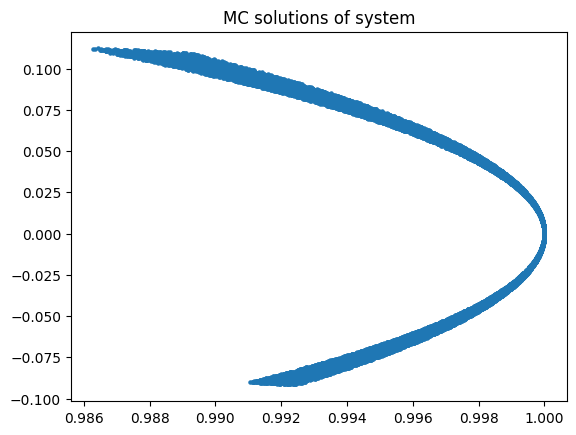

MC std x,y: 0.0031359319639066895 0.05815094346927308
analytic sigma x,y: 0.0 0.0577350269189626


In [6]:
from scipy.optimize import root

a_int=(0.9,1.1)
b_int=(0.9,1.1)

def F(z,a,b):
    x,y=z
    return np.array([a*x+y-1, x+b*y*y-1])

z0=np.array([1.0,0.0])

def solve_sys(a,b):
    s=root(lambda z:F(z,a,b),z0)
    return s.x if s.success else None

M=20000
sol=[]

for _ in range(M):
    a=rng.uniform(*a_int)
    b=rng.uniform(*b_int)
    z=solve_sys(a,b)
    if z is not None and np.linalg.norm(z-z0)<0.8:
        sol.append(z)

sol=np.array(sol)
x=sol[:,0]
y=sol[:,1]

plt.scatter(x,y,s=5)
plt.title("MC solutions of system")
plt.show()

sa=sigma_u(a_int)
sb=sigma_u(b_int)

a0=mid(a_int)
b0=mid(b_int)
x0,y0=solve_sys(a0,b0)

J=np.array([[a0,1],[1,2*b0*y0]])
Jinv=np.linalg.inv(J)

Fa=np.array([x0,0])
Fb=np.array([0,y0*y0])

dx_a=-Jinv@Fa
dx_b=-Jinv@Fb

sx=math.sqrt((dx_a[0]*sa)**2+(dx_b[0]*sb)**2)
sy=math.sqrt((dx_a[1]*sa)**2+(dx_b[1]*sb)**2)

print("MC std x,y:",x.std(),y.std())
print("analytic sigma x,y:",sx,sy)

По результатам Монте-Карло видно, что решения системы лежат почти на одной кривой: переменная x меняется очень слабо, а основная неопределённость приходится на y. Поэтому разброс x почти нулевой, что согласуется с аналитической оценкой, тогда как для
y разброс заметно больше.